In [17]:
from pathlib import Path

from librep.estimators.dimal import DIMAL
import pytorch_lightning as pl
import torch

from librep.datasets.har.loaders import PandasMultiModalLoader

In [18]:
processed_view_path = Path("/home/lopani/Documents/Doutorado/UNICAMP/H.IAAC-Meta4/hiaac-m4-experiments/preliminary_analysis/datasets_preprocessing/data/processed/KuHar/balanced_normalized")

In [19]:
train_raw, validation_raw, test_raw = PandasMultiModalLoader(processed_view_path).load(
    label="standard activity code"
)

In [28]:
x = torch.from_numpy(train_raw[:][0]).double()
y = torch.from_numpy(train_raw[:][1].values).double()

In [30]:
x

tensor([[ 1.0152e-02, -4.7909e-03, -1.6946e-03,  ..., -1.4326e-02,
         -9.1198e-03, -5.4532e-03],
        [-1.0230e-02,  1.4968e-02, -5.2134e-02,  ..., -3.1574e-03,
         -6.7523e-04, -3.6091e-04],
        [ 4.4708e-02, -4.7935e-02,  5.6565e-02,  ..., -6.9652e-03,
         -1.6596e-03,  2.1321e-04],
        ...,
        [-2.2779e+00, -1.1530e+00, -1.3839e+00,  ..., -8.4796e-01,
         -5.5966e-01, -3.6623e-01],
        [ 1.1538e+00,  4.3343e+00, -6.3352e+00,  ..., -1.1036e-01,
         -5.2955e-02,  2.2454e-01],
        [-2.4412e+00, -5.2468e+00, -1.2993e+01,  ...,  1.4905e-02,
         -2.5568e-01, -3.8717e-01]], dtype=torch.float64)

In [33]:
# Initialize the DIMAL model
input_dim = 360
hidden_dims = [256, 128, 64]
output_dim = 2
model = DIMAL(input_dim, hidden_dims, output_dim)

# Train the model
trainer = pl.Trainer(max_epochs=50)
trainer.fit(model, (x.double(), y.double()))

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/lopani/Documents/Doutorado/UNICAMP/H.IAAC-Meta4/hiaac-librep/.librep-venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(

  | Name          | Type       | Params
---------------------------------------------
0 | input_layer   | Linear     | 92.4 K
1 | hidden_layers | ModuleList | 41.2 K
2 | output_layer  | Linear     | 130   
---------------------------------------------
133 K     Trainable params
0         Non-trainable params
133 K     Total params
0.535     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

RuntimeError: expected scalar type Double but found Float

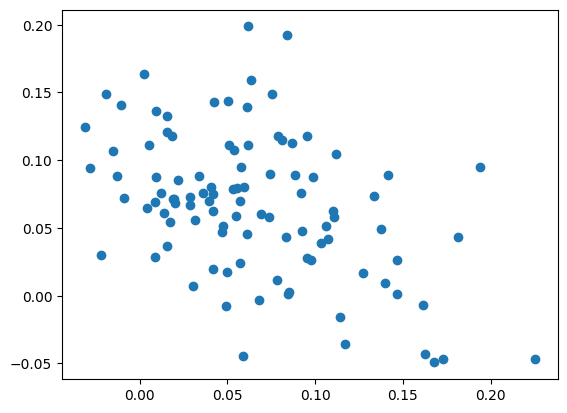

In [11]:
import matplotlib.pyplot as plt
vals = model(X).detach().numpy()
x, y = vals[:, 0], vals[:, 1]
plt.scatter(x, y)
plt.show()